In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

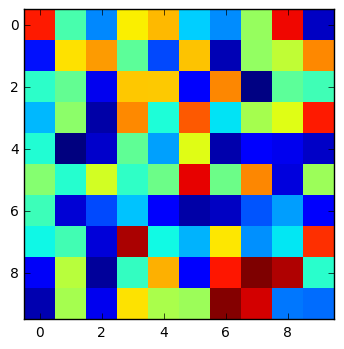

In [3]:
plt.imshow(np.random.rand(10,10), interpolation='none')

In [1]:
#%matplotlib qt
# qt install compeling too ling
#plt.imshow(np.random.rand(10,10),interpolation='none')

In [2]:
# Using mpld3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

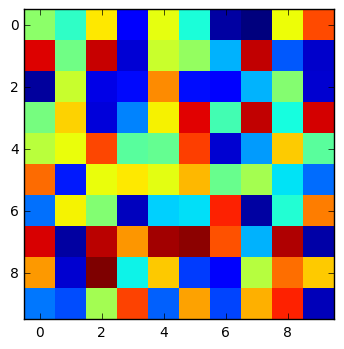

In [3]:
plt.imshow(np.random.rand(10,10),interpolation='none')

In [4]:
# Using pyplot and seaborn
# MATLAB style

import numpy as np
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

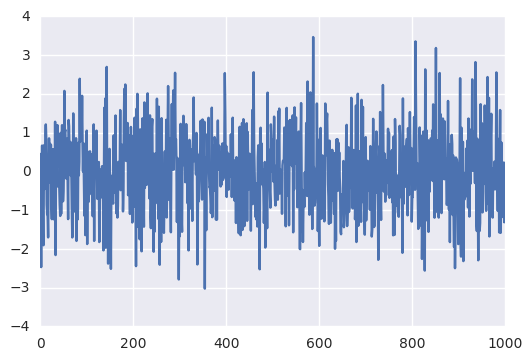

In [5]:
y=np.random.randn(1000)
plt.plot(y)

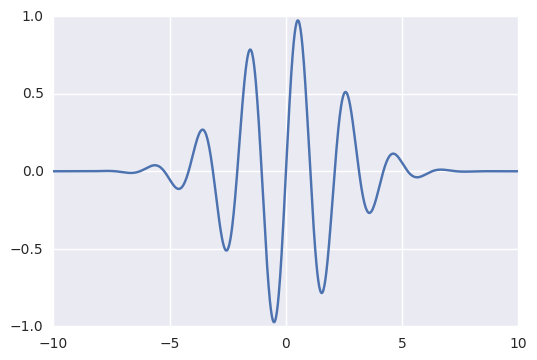

In [8]:
x=np.linspace(-10.,10.,1000)
y=np.sin(3*x)*np.exp(-.1*x**2)
plt.plot(x,y)

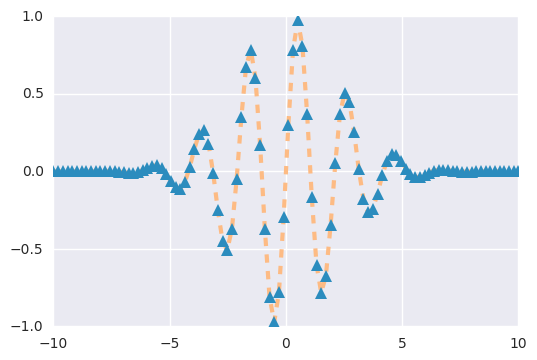

In [10]:
# Customized plot
x=np.linspace(-10.,10.,100)
y=np.sin(3*x)*np.exp(-.1*x**2)

# lw indicates the line width
# mfc: marker face color
# ms: marker size
plt.plot(x,y,'--^',lw=3,color='#fdbb84',mfc='#2b8cbe',ms=8)

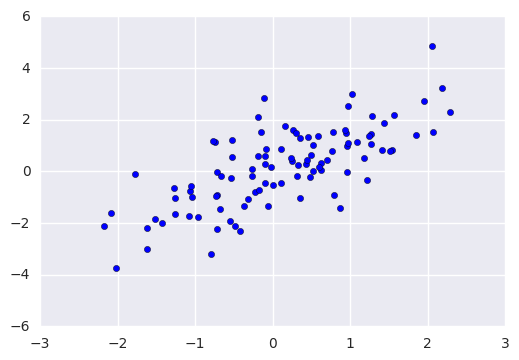

In [12]:
# scatter plot
x=np.random.randn(100)
y=x+np.random.randn(100)
plt.scatter(x,y)

## Customizing matplotlib figure

In [ ]:
# Left panel.
# row number: 1
# column number: 2
# index of subplot in the grid(from left to right, from top to bottom)

plt.subplot(1, 2, 1)
x = np.linspace(-10., 10., 1000)
plt.plot(x, np.sin(x), '-r', label='sinus')
plt.plot(x, np.cos(x), ':g', lw=1, label='cosinus')
plt.xticks([-10, 0, 10])
plt.yticks([-1, 0, 1])
plt.ylim(-2, 2)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Two plots")
plt.legend()

# Right panel.
plt.subplot(1, 2, 2, polar=True)
x = np.linspace(0, 2 * np.pi, 1000)
plt.plot(x, 1 + 2 * np.cos(6 * x))
plt.yticks([])
plt.xlim(-.1, 3.1)
plt.ylim(-.1, 3.1)
plt.xticks(np.linspace(0, 5 * np.pi / 3, 6))
plt.title("A polar plot")
plt.grid(color='k', linewidth=1, linestyle=':')

## Interacting with matplotlib figures
Skipped

## High-level plotting with seaborn

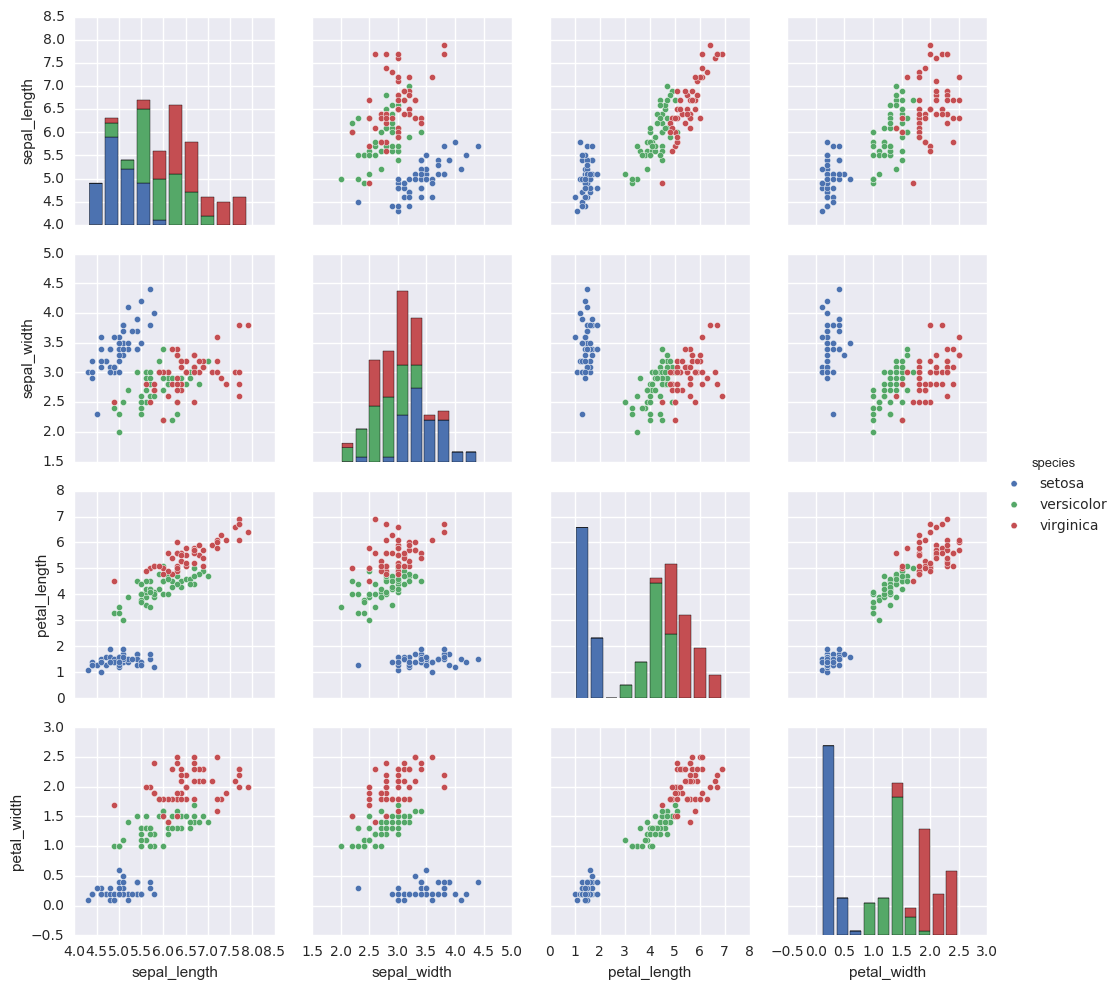

In [18]:
# Famous iris classification dataset
# pair plot
df = seaborn.load_dataset("iris")
seaborn.pairplot(df, hue="species",size=2.5)

## Image processing

In [3]:
import numpy as np
import skimage
from skimage import img_as_float
import skimage.filters as skif
from skimage.color import rgb2gray
import skimage.data as skid
import skimage.exposure as skie
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [4]:
chelsea=skid.chelsea()

In [5]:
chelsea.shape, chelsea.dtype

((300, 451, 3), dtype('uint8'))

(-0.5, 450.5, 299.5, -0.5)

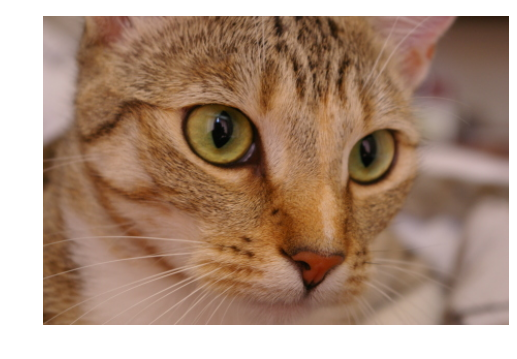

In [7]:
plt.imshow(chelsea)
plt.axis('off')

In [8]:
img = rgb2gray(chelsea)
img.shape, img.dtype


((300, 451), dtype('float64'))

In [9]:
p2, p98 = np.percentile(img, (2, 98))

# three different algorithms
img_rescale = skie.rescale_intensity(img, in_range=(p2, p98))
img_eq = skie.equalize_hist(img)
img_adapteq = img_as_float(skie.equalize_adapthist(img, clip_limit=0.03))

# interact decorator with dropdown menu
hist_types = dict([('Contrast stretching', img_rescale),
                   ('Histogram equalization', img_eq),
                   ('Adaptive equalization', img_adapteq)])

/Users/tianyuelite/Anaconda/anaconda/envs/ClassicalML/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


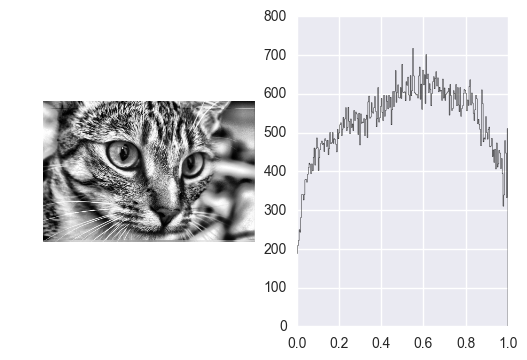

In [10]:
@interact(hist_type=list(hist_types.keys()))
def display_result(hist_type):
    result = hist_types[hist_type]

    # We display the processed grayscale image on the left.
    plt.subplot(121)
    plt.imshow(result, cmap='gray')
    plt.axis('off')

    # We display the histogram on the right.
    plt.subplot(122)
    plt.hist(result.ravel(), bins=np.linspace(0., 1., 256),
             histtype='step', color='black')

    plt.show()